<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Classification_KNN_chooseKvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors Classifier


    1.Load the training data.
    2.Prepare data by scaling, missing value treatment, and dimensionality reduction as required.
    3.Find the optimal value for K:
    4.Predict a class value for new data:
        1.Calculate distance(X, Xi) from i=1,2,3,….,n.
        where X= new data point, Xi= training data, distance as per your chosen distance metric.
        2.Sort these distances in increasing order with corresponding train data.
        3.From this sorted list, select the top ‘K’ rows.
        4.Find the most frequent class from these chosen ‘K’ rows. This will be your predicted class.


In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

## Analyse data and get best 'k' value

In [ ]:
df = pd.read_csv('datasets/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='species', ylabel='count'>

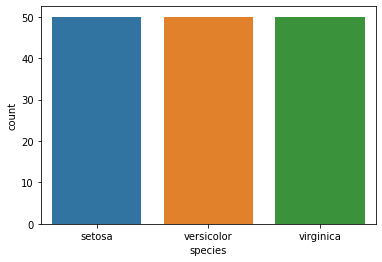

In [ ]:
sns.countplot(data=df, x='species')

<AxesSubplot:xlabel='sepal_length'>

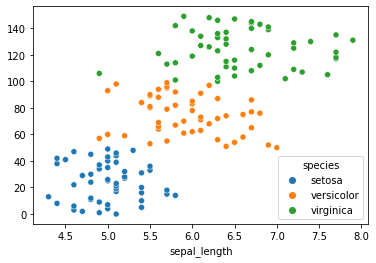

In [ ]:
sns.scatterplot(data=df, x='sepal_length',y=df.index,hue= 'species')

In [ ]:
x=df.drop(columns=['species'])
y=df["species"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

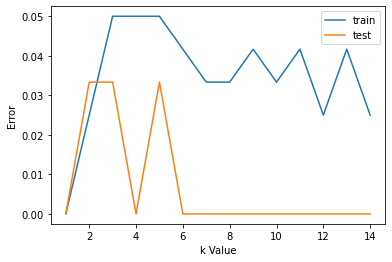

In [ ]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    y_pred1= knn.predict(xtrain)
    error1.append(np.mean(ytrain!= y_pred1))
    y_pred2= knn.predict(xtest)
    error2.append(np.mean(ytest!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

Conclusion :

        The K value when test error stabilizes and is low is considered as optimal value for K. 
        From the above error curve we can choose K=6 for our KNN algorithm implementation.

## Fit model and predict classes

In [ ]:
model=KNeighborsClassifier(n_neighbors=6)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy Score : 1.0
Classification Report :               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

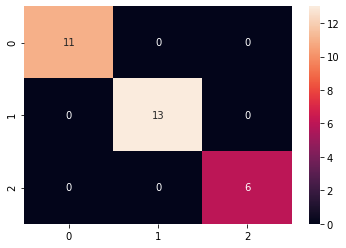

In [ ]:
print("Accuracy Score :",accuracy_score(ytest,ypred))
print("Classification Report :",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

<AxesSubplot:xlabel='sepal_length'>

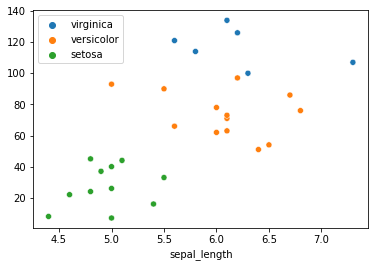

In [ ]:
sns.scatterplot(data=xtest, x=xtest['sepal_length'],y=ytest.index,hue= ypred)

## Tunning Hyperparameters

In [ ]:
#Parameter grid-->n_neighbors , metric , weights
n_neighbors=range(1,15)
metric=["euclidean","manhattan","minkowski"]
weights=['uniform','distance']
grid={"n_neighbors":n_neighbors,"metric":metric,"weights":weights}

kfold=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)

In [ ]:
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=kfold,scoring="accuracy",n_jobs=1)
res=grid_cv.fit(xtrain,ytrain)
print(res.best_score_)
print(res.best_params_)

0.9638888888888889
{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}


In [ ]:
model=KNeighborsClassifier(n_neighbors=8, metric='euclidean', weights='uniform')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy Score : 1.0
Classification Report :               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

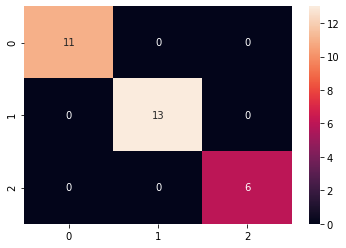

In [ ]:
print("Accuracy Score :",accuracy_score(ytest,ypred))
print("Classification Report :",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

<AxesSubplot:xlabel='petal_width'>

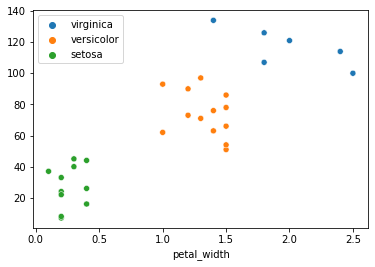

In [ ]:
sns.scatterplot(data=xtest, x=xtest['petal_width'],y=ytest.index,hue= ypred)

Conclusion :
        
        KNN-classifier can be used when your data set is small enough, so that KNN-Classifier completes running in a shorter time. The complexity for applying a Naive bayes model is o(1) So, even though KNN works best for your data, when you know your data size will keep increasing its wise to choose Naive Bayes.